In [1]:
Notebook to get and clean the data of Libreration newspaper about covid19 vaccination

In [ ]:
from helpers import *

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u200b', '', text)
#     text = re.sub('\w*\d\w*', '', text)
    return text

## LIBÉRATION

In [3]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Get LATEST driver version for 96.0.4664
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45]


In [4]:
search_url='https://www.liberation.fr/'

driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
#cookkies

In [5]:
def login(): 
    #Se conecter button
    driver.find_element_by_xpath('/html/body/div[3]/header/nav/div[1]/div[3]/div[2]/div/div/a[1]').click()
    time.sleep(5)
    driver.find_element_by_id("1-email").send_keys(email)
    time.sleep(2)
    driver.find_element_by_name("password").send_keys(password)
    time.sleep(2)
    #Button connexion
    driver.find_element_by_xpath('/html/body/div/div/div[2]/form/div/div/div/button').click()

In [6]:
def search(): 
    time.sleep(2)
    #Lupa
    driver.find_element_by_xpath('//button[@class="nav-btn nav-btn-light transparent border"]').click()
    #words to make the search
    time.sleep(1)
    key_words = 'vaccination covid-19'
    driver.find_element_by_id("queryly_query").send_keys(key_words)
    time.sleep(1)
    driver.find_element_by_id("advanced_searchbutton").click()
    

In [7]:
def get_links_liberation():
    list_links_liberation=[]
#     driver.get(search_url)
    while True: 
        links = driver.find_elements_by_xpath('//div[@class="queryly_item_row"]/a')
        for i in links: 

            list_links_liberation.append(i.get_attribute('href'))
        time.sleep(1)
        try: 
            next = driver.find_element_by_xpath('//a[@class="next_btn"]')
            next.click()
            time.sleep(0.5)
        except :
            print("No more pages left")
            break
    return list_links_liberation

In [8]:
# def get_articles_liberation(list_links_liberation):
#     articles_list_liberation=[]

#     for i in list_links_liberation: 
#         driver.get(i)
#         try: 
#             title=driver.find_element_by_xpath('//h1').text
#             subheadline = driver.find_element_by_xpath('//span[@class="TypologyArticle__BlockSubHeadline-sc-1vro4tp-4 fppQiK"]').text
#             author=driver.find_element_by_xpath('/html/body/div[1]/section/div/div[2]/div/span').text
#             date =driver.find_element_by_xpath('/html/body/div[1]/section/div/div[2]/div/div[2]/div[1]').text
#             text=driver.find_element_by_xpath('//article[@class="article-body-wrapper article_table article_blockquote font_secondary"]').text
#             time.sleep(1)
#         except: 
#             title, subheadline, author, date, text = 'error'
#             continue
#         articles_list_liberation.append({'Title': title, 
#                               'Subheadline':subheadline,
#                               'Authors': author, 
#                               'Date':date,
#                               'Text':text,                        
#                               'Link':i}) 

In [10]:
# # Remember accept cookies
login()

In [43]:
search()

In [13]:
# list_links_libeartion= get_links_liberation()

No more pages left


In [17]:
# Store the list in a document
with open("list_links_liberation.txt", 'w') as f:
    for s in list_links_libeartion:
        f.write(str(s) + '\n')


In [44]:
with open("list_links_liberation.txt", 'r') as f:
    list_links_liberation = [line.rstrip('\n') for line in f]
    list_links_liberation= list(set(list_links_liberation))
len(list_links_liberation)

1945

In [45]:
def get_html_liberation(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        #aqui es -2 porque acaba el link con una barra, enonces cogia un espacio en blanco
        tail=i.split('/')[-2]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LIBERATION/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [46]:
get_html_liberation(list_links_liberation)

In [3]:
import os
list_articles_liberation=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LIBERATION/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LIBERATION/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='font_xs display_block link_primary-color margin-xs-bottom').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="TypologyArticle__BlockSubHeadline-sc-1vro4tp-4 fppQiK").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find(class_="font_xs color_grey margin-xxs-right font_tertiary header-date").text
    except: 
        date="error"
    try:
        tf=soup.find_all("p",class_="article_link")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text= "error"
    list_articles_liberation.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 



In [4]:
articles_Liberation = pd.DataFrame.from_dict(list_articles_liberation)

In [6]:
# clean text
articles_Liberation['Text']=articles_Liberation['Text'].apply(preprocessor)
articles_Liberation['Title']=articles_Liberation['Title'].apply(preprocessor)

In [7]:
articles_Liberation['Newspaper']= 'Liberation'
articles_Liberation['Country']= 'France'
articles_Liberation['n_words'] = articles_Liberation.Text.apply(lambda x: len(str(x).split(' ')))

In [8]:
#Date
articles_Liberation['Date'] = articles_Liberation['Date'].str.split("publié le ").str[1]
for index,row in articles_Liberation.iterrows(): 
    try:
        articles_Liberation['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue

/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
/tmp/ipykernel_286572/3522168718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_Liberation['Date'][index] =dateparser.parse(row.Date).date()


In [9]:
articles_Liberation.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
1415,Un laboratoire israélien a-t-il développé un v...,"Un laboratoire, parmi d'autres, a annoncé être...",Question posée par Bougrat le 03/03/2020 Bonjo...,par Pauline Moullot,2020-03-05,https://www.liberation.fr/checknews/2020/03/05...,Liberation,France,619
909,Comment Angela Merkel peut-elle affirmer que 6...,Selon des propos rapporté par le journal «Bild...,"Question posée par Elina, le 10/03/2020. Bonjo...",par Jacques Pezet,2020-03-11,https://www.liberation.fr/checknews/2020/03/11...,Liberation,France,513
1361,Quel confinement pour ceux qui nont pas de toit?,Les mesures préconisées par le gouvernement ne...,"Tribune. Lors de son allocution, lundi soir, l...",par Le collectif Agros pour une autre PAC,2020-03-18,https://www.liberation.fr/debats/2020/03/18/qu...,Liberation,France,935
821,Une «grippe asiatique» avait-elle vraiment fai...,"Au niveau international, l’OMS estime que cett...",Question posée par Sophie le 15/03/2020 Bonjou...,par Vincent Coquaz,2020-03-22,https://www.liberation.fr/checknews/2020/03/22...,Liberation,France,1251
242,«La crise du coronavirus est une crise écologi...,L'écologue de la santé Serge Morand souligne l...,Libération Serge Morand est écologue de la san...,par Coralie Schaub,2020-03-26,https://www.liberation.fr/terre/2020/03/26/la-...,Liberation,France,1843
...,...,...,...,...,...,...,...,...,...
666,Une heure après l’allocution de Macron : 100 0...,"Depuis la prise de parole du président, annonç...",C’est le retour de la Doctolib mania. Une heur...,par LIBERATION,2021-11-09,https://www.liberation.fr/societe/sante/une-he...,Liberation,France,244
32,"Allocution de Macron : pour les seniors, l’inj...",Le Président a annoncé ce mardi qu’à partir du...,Quatre mois presque jour pour jour après son a...,par Nathalie Raulin,2021-11-09,https://www.liberation.fr/societe/sante/allocu...,Liberation,France,595
1211,"Vaccin : sur Doctolib, la course à la troisièm...",Avant le discours d’Emmanuel Macron ce mardi à...,Emmanuel Macron doit s’adresser ce mardi soir ...,par LIBERATION,2021-11-09,https://www.liberation.fr/societe/sante/vaccin...,Liberation,France,328
1755,Allocution télévisée : Macron enfile son costu...,"Ce mardi soir, le Président a pris la parole d...",Une petite dose de Covid. Une grosse dose de p...,par Paul Quinio,2021-11-09,https://www.liberation.fr/politique/allocution...,Liberation,France,310


In [10]:
articles_Liberation['Newspaper']= 'Liberation'
articles_Liberation['Country']= 'France'
articles_Liberation['n_words'] = articles_Liberation.Text.apply(lambda x: len(str(x).split(' ')))

In [11]:
articles_Liberation.sort_values('n_words')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
537,"Au vaccinodrome de Toulouse, «nous sommes tous...","Dans la capitale occitane, un centre de vaccin...",Installé dans le hall 8 de l’ancien Parc des e...,par Ulrich Lebeuf. Myop,2021-04-06,https://www.liberation.fr/culture/photographie...,Liberation,France,116
758,Covid-19: la barre des 1000patients en réanima...,"Une nouvelle fois, les services de soins criti...",Plus de 1000patients malades d’une forme grave...,par LIBERATION et AFP,2021-07-29,https://www.liberation.fr/societe/sante/covid-...,Liberation,France,167
131,Covid-19 : tous les indicateurs à la baisse,"Ce mercredi, jour de nouvelle étape du déconfi...","Ce mercredi, le déconfinement passe une nouvel...",par Alice Clair et Julien Guillot,2021-06-09,https://www.liberation.fr/societe/sante/covid-...,Liberation,France,171
1409,"Campagne vaccinale: la France, toujours deux m...",Les deux pays suivant des dynamiques similaire...,En comparant les données de vaccination en Fra...,"par Savinien de Rivet, Julien Guillot et Alice...",2021-06-24,https://www.liberation.fr/societe/sante/campag...,Liberation,France,183
1297,Covid-19: où en est la vaccination des jeunes?,"A la veille de la rentrée scolaire, le niveau ...",C’est l’une des poches de non-vaccinés à aller...,par Alice Clair et Julien Guillot,2021-09-01,https://www.liberation.fr/societe/education/co...,Liberation,France,186
...,...,...,...,...,...,...,...,...,...
1624,Un mois de vaccination : quand lintendance doi...,"Tout au long du mois de janvier, hospitaliers,...","Un mois de campagne, près dun million et demi ...","par Eric Favereau, Nathalie Raulin, Anaïs Mora...",2021-01-31,https://www.liberation.fr/france/2021/01/31/un...,Liberation,France,4226
1717,Covid-19 : Le nombre de patients à l’hôpital e...,"Vaccination, déconfinement, bilan épidémique, ...",Trudeau appelle les Canadiens à ne pas privilé...,par LIBERATION,2021-05-04,https://www.liberation.fr/societe/sante/covid-...,Liberation,France,4252
759,"Avec 3631patients en réanimation, la baisse se...","Vaccination, reconfinement, bilan épidémique, ...","A Bordeaux, le quartier de Bacalan bientôt ent...",par LIBERATION et AFP,2021-05-21,https://www.liberation.fr/international/retrou...,Liberation,France,4306
461,Covid-19 : Emmanuel Macron ne prendra pas la p...,,"Vaccination, reconfinement, bilan épidémique, ...","par LIBERATION, avec AFP",2021-01-18,https://www.liberation.fr/planete/2021/01/18/e...,Liberation,France,5905


In [15]:
articles_Liberation[articles_Liberation.duplicated()]

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
1370,"Galère des jobs d’été: «Depuis janvier, je sui...",Après une année universitaire marquée par la c...,Ils sont habituellement nombreux à tenter de r...,par Elise Viniacourt et Cassandre Leray,2021-07-25,https://www.liberation.fr/societe/galere-des-j...,Liberation,France,1558


In [13]:
# articles_Liberation=articles_Liberation.drop_duplicates()

In [16]:
articles_Liberation.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_liberation_10_11_2021_premium.csv', index = False)

In [25]:
# ****************************************************************************************************

In [17]:
df = pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_liberation_10_11_2021_premium.csv')

# NER

In [7]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [8]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [9]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

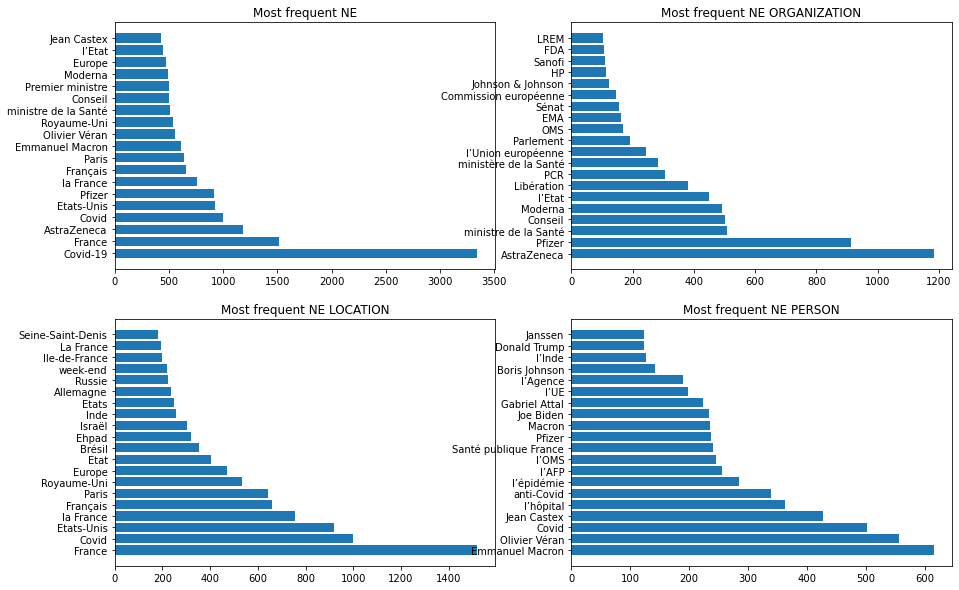

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')

In [ ]:
#TESTING TRANSLATION

In [29]:
from googletrans import Translator
import pandas as pd
df = pd.read_csv('/home/david/Escritorio/VACTINATION_PROJECT/articles_liberation_10_11_2021_premium.csv')
df=df.head(100)
translator =Translator()

list_articles_liberation_english=[]

for index, row in df.iterrows():
    try:
        title= translator.translate(df.Title[index],dest="en").text
    except:
        title="error"
    try:
        subheadline= translator.translate(df.Subheadline[index],dest="en").text
    except:
        subheadline="error"
    try:
        text= translator.translate(df.Text[index],dest="en").text
    except:
        text="error"
    author=df.Authors[index]
    date=df.Date[index]
    link=df.Link[index]

    list_articles_liberation_english.append({'Title': title,
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author,
                          'Date': date,
                          'Link':link})


articles_liberation_english = pd.DataFrame.from_dict(list_articles_liberation_english)

# articles_liberation_english.to_csv(r'/idiap/temp/ddbarrio/VACCINATION_PROJECT/DATAFRAMES/articles_liberation_english.csv', index = False)


In [30]:
articles_liberation_english.Text[1]

'En Israël, Benyamin Nétanyahou vers la sortie ? En apportant son soutien au chef de l’opposition israélienne, le héraut de la droite radicale Naftali Bennett a ouvert la voie à la formation d’un «gouvernement du changement» qui pourrait faire tomber Benjamin Nétanyahou, Premier ministre le plus pérenne de l’histoire d’Israël. Mais rien n’est fait. Malgré ce ralliement de poids, Yaïr Lapid, centriste à la tête de l’opposition israélienne, a encore quatre députés à rallier pour former une coalition capable de tourner la page de l’ère Nétanyahou. Son mandat, reçu début mai du président Reuven Rivlin après l’échec de Nétanyahou à former une coalition, court jusqu’à mercredi, 23 h 59. Benyamin Nétanyahou risque de perdre son pouvoir après plus de quinze ans à la tête du gouvernement sur les vingt-cinq dernières années. Notre article. La NSA a espionné Merkel et ses alliés européens grâce aux services danois, selon des médias. Les Etats-Unis ont espionné des responsables politiques en Europ

In [14]:
df.sort_values("n_words")

Title  \
1922  Au vaccinodrome de Toulouse, «nous sommes tous mobilisés collectivement»                               
1378  Covid-19 : la barre des 1 000 patients en réanimation de nouveau franchie                              
1770  Covid-19 : tous les indicateurs à la baisse                                                            
546   Campagne vaccinale : la France, toujours deux mois derrière le Royaume-Uni                             
838   Covid-19 : où en est la vaccination des jeunes ?                                                       
...                                                ...                                                       
1306  Un mois de vaccination : quand l'intendance doit suivre, et raconte                                    
686   Covid-19 : Le nombre de patients à l’hôpital et dans les services de réanimation en baisse en France   
299   Avec 3 631 patients en réanimation, la baisse se poursuit                                              
1748  Covid-19 : Emmanuel Macron ne prendra pas la parole dans les prochains jours                           
656   Covid-19 : plus de 15 000 nouvelles contaminations en 24 heures                                        

                                                                                                                                                                                                                               Subheadline  \
1922  Dans la capitale occitane, un centre de vaccination de 2 200 m2 a ouvert ses potes dans l’ancien Parc des expositions. Soignants, pompiers et bénévoles sont engagés et espèrent atteindre un objectif de 4 000 injections par jour.   
1378  Une nouvelle fois, les services de soins critiques se remplissent progressivement depuis quelques semaines sous la pression des contaminations au variant delta, au point de redépasser ce seuil symbolique ce jeudi soir.             
1770  Ce mercredi, jour de nouvelle étape du déconfinement, les données sont bonnes… comme il y a un an. La différence, c’est la vaccination, qui pourrait protéger de nouvelles vagues épidémiques.                                         
546   Les deux pays suivant des dynamiques similaires dans leur rythme d’injections, la France n’a toujours pas rattrapé son retard à l’allumage.  L’écart entre le nombre de décès est comparable.                                          
838   A la veille de la rentrée scolaire, le niveau de vaccination des élèves est beaucoup moins élevé que celui de la population adulte.                                                                                                    
...                                                                                                                                   ...                                                                                                    
1306  Tout au long du mois de janvier, hospitaliers, gériatre, personnels d'Ehpad ont raconté à «Libération» les soubresauts de la campagne vaccinale contre le Covid-19.                                                                    
686   Vaccination, déconfinement, bilan épidémique, mutation du virus… Retrouvez les dernières informations sur la crise sanitaire liée à la pandémie de Covid-19.                                                                           
299   Vaccination, reconfinement, bilan épidémique, mutation du virus… Retrouvez les dernières informations sur la crise sanitaire liée à la pandémie de Covid-19.                                                                           
1748  NaN                                                                                                                                                                                                                                    
656   NaN                                                                                                                                                         

In [16]:
print(f"Title: {df.loc[1922].Title}")
print(f"Subheadline: {df.loc[1922].Subheadline}")
print(f"Text: {df.loc[1922].Text}")
print(f"Author: {df.loc[1922].Authors}")
print(f"Date: {df.loc[1922].Date}")

Title: Au vaccinodrome de Toulouse, «nous sommes tous mobilisés collectivement»
Subheadline: Dans la capitale occitane, un centre de vaccination de 2 200 m2 a ouvert ses potes dans l’ancien Parc des expositions. Soignants, pompiers et bénévoles sont engagés et espèrent atteindre un objectif de 4 000 injections par jour.
Text: Installé dans le hall 8 de l’ancien Parc des expositions, sur l’île du Ramier, le vaccinodrome de Toulouse va fonctionner sept jours sur sept, de 9 à 19 heures, sur rendez-vous, à partir de mercredi. L’ouverture, qui avait été officiellement annoncée par la préfecture le jeudi 1er avril, était en préparation. Elle est devenue réalité au lendemain du discours du président de la République appelant à nouveau à accélérer la vaccination, possible grâce à l’engagement remarquable de plusieurs dizaines de volontaires du Samu, du Service départemental d’incendie et de secours (SDIS), des associations de bénévoles de la sécurité civile et du Service de santé des armées, e